In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
pd.options.display.max_columns = None
# Converting excel file to csv file
df = pd.read_excel('../../data/crash_data/crash_data_I405.xlsx',sheet_name= 'Detailed Crash History')
df.to_csv('crashdata.csv', encoding='utf-8')
df = pd.read_csv('crashdata.csv',skiprows = 3)
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['DATE'].dt.year == 2018 ]

In [2]:
print(df.head(2))

     2 JURISDICTION COUNTY      CITY  PRIMARY TRAFFICWAY  MILEPOST  A/B  \
13  16  State Route   King  Bellevue                 405     13.62  NaN   
14  17  State Route   King  Bellevue                 405     13.62  NaN   

   SR ONLY HISTORY / SUSPENSE IND REPORT NUMBER       DATE   TIME  \
13                             No       E797375 2018-05-06  14:18   
14                             No       E848389 2018-10-09  00:23   

   MOST SEVERE INJURY TYPE  # INJ  # FAT  # VEH  # PEDS  # BIKES  \
13      No Apparent Injury      0      0      2       0        0   
14      No Apparent Injury      0      0      1       0        0   

                                   VEHICLE 1 TYPE VEHICLE 2 TYPE  \
13  Pickup,Panel Truck or Vanette under 10,000 lb  Passenger Car   
14                   Truck Tractor & Semi-Trailer            NaN   

                  JUNCTION RELATIONSHIP   WEATHER ROADWAY SURFACE CONDITION  \
13  Not at Intersection and Not Related  Overcast                       Dry  

In [3]:
print(df.columns)
print(df['FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)'].unique())

Index(['2', 'JURISDICTION', 'COUNTY', 'CITY', 'PRIMARY TRAFFICWAY', 'MILEPOST',
       'A/B', 'SR ONLY HISTORY / SUSPENSE IND', 'REPORT NUMBER', 'DATE',
       'TIME', 'MOST SEVERE INJURY TYPE', '# INJ', '# FAT', '# VEH', '# PEDS',
       '# BIKES', 'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'JUNCTION RELATIONSHIP',
       'WEATHER', 'ROADWAY SURFACE CONDITION', 'LIGHTING CONDITION',
       'FIRST COLLISION TYPE / OBJECT STRUCK', 'VEHICLE 1 ACTION',
       'VEHICLE 2 ACTION', 'VEHICLE 1 COMPASS DIRECTION FROM',
       'VEHICLE 1 COMPASS DIRECTION TO', 'VEHICLE 2 COMPASS DIRECTION FROM',
       'VEHICLE 2 COMPASS DIRECTION TO',
       'MV DRIVER CONTRIBUTING CIRCUMSTANCE 1 (UNIT 1)',
       'MV DRIVER CONTRIBUTING CIRCUMSTANCE 2 (UNIT 1)',
       'MV DRIVER CONTRIBUTING CIRCUMSTANCE 3 (UNIT 1)',
       'MV DRIVER CONTRIBUTING CIRCUMSTANCE 1 (UNIT 2)',
       'MV DRIVER CONTRIBUTING CIRCUMSTANCE 2 (UNIT 2)',
       'MV DRIVER CONTRIBUTING CIRCUMSTANCE 3 (UNIT 2)',
       'PEDESTRIAN CONTRIBUTIN

In [4]:
print(list(zip(df['VEHICLE 1 COMPASS DIRECTION TO'].unique(),df['FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)'].unique())))

[('South', 'Lane 1 Decreasing Milepost'), ('North', 'Right Shoulder Increasing Milepost'), ('Vehicle Backing', 'Lane 3 Decreasing Milepost'), ('Vehicle Stopped', 'Lane 3 Increasing Milepost'), ('West', 'Lane 5 Decreasing Milepost'), ('Southeast', 'Lane 1 Increasing Milepost'), ('Northeast', 'Lane 2 Decreasing Milepost'), ('East', 'Lane 4 Increasing Milepost'), ('Southwest', 'Lane 4 Decreasing Milepost'), (nan, 'Median Shoulder Increasing Milepost'), ('Northwest', 'Right Shoulder Decreasing Milepost')]


In [62]:
# Reading trip id def
dftrip = pd.read_csv('tripdefIDs.csv')
print(dftrip.head(2))

   Trip def ID  Possible 2nd trip def ID  Entry plaza  Exit plaza  \
0         2731                      2686            4           7   
1         2732                      2687            4          12   

   Actual entry mile post  Actual exit mile post  
0                    13.6                  20.47  
1                    13.6                  28.98  


In [64]:
word_list = ['Decreasing','Increasing']
#hello = dfnew['FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)'].str.extract('({})'.format('|'.join(word_list)))
dfnew['North_South'] =dfnew['FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)'].str.extract(r'(Decreasing|Increasing)',expand=True)
dfnewnorth = dfnew[dfnew['North_South']=='Increasing']
print(dfnewnorth.shape[0])
dfnewsouth = dfnew[dfnew['North_South']=='Decreasing']
print(dfnewsouth.shape[0])
print(dfnew.shape[0])
print(dfnewsouth.head(2))

524
572
1096
    MILEPOST  \
13     13.62   
15     13.62   

   FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)  \
13                         Lane 1 Decreasing Milepost                       
15                         Lane 3 Decreasing Milepost                       

   North_South  
13  Decreasing  
15  Decreasing  


In [65]:
dfnew = df[['MILEPOST', 'FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)']]
for i in range(0, len(dftrip['Trip def ID'])):
    y1 = dftrip['Trip def ID'].iloc[i]
    y2 = dftrip['Actual entry mile post'].iloc[i]
    y3 = dftrip['Actual exit mile post'].iloc[i]
    y1 =str(y1)
    # dfnew[y1] = dfnew['MILEPOST'].apply(lambda x: 'North Bound' if (y2<x and y3>x) else  ( 'South Bound' if (y2>x and y3<x)  else 'None'))
    if(y2 <y3):
        dfnewnorth[y1] = dfnewnorth['MILEPOST'].apply(lambda x: 1 if (y2<x and y3>x)  else 0)
    elif(y3<y2):
        dfnewsouth[y1] = dfnewsouth['MILEPOST'].apply(lambda x: 1 if (y2>x and y3<x)  else 0)
print(dfnewnorth.head(2))
print(dfnewsouth.head(2))       



    MILEPOST  \
14     13.62   
21     13.63   

   FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)  \
14                 Right Shoulder Increasing Milepost                       
21                         Lane 3 Increasing Milepost                       

   North_South  2731  2732  2733  2734  2735  2736  2738  2739  2740  2741  \
14  Increasing     1     1     0     1     1     1     0     0     0     0   
21  Increasing     1     1     0     1     1     1     0     0     0     0   

    2742  2743  2774  
14     0     0     1  
21     0     0     1  
    MILEPOST  \
13     13.62   
15     13.62   

   FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)  \
13                         Lane 1 Decreasing Milepost                       
15                         Lane 3 Decreasing Milepost                       

   North_South  2744  2745  2746  2748  2749  2750  2751  2752  2753  2754  \
13  Decreasing     0     0     0     0     0     0     0

/Users/Kiana/miniconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
import numpy as np
table1 = pd.pivot_table(dfnewnorth, index = 'FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)',aggfunc=np.sum )
table2 = pd.pivot_table(dfnewsouth, index = 'FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)',aggfunc=np.sum )

In [127]:
tot_north = table1.sum().to_frame().T
print(tot_north)
tot_south = table2.sum().to_frame().T
print(tot_south)

    2731   2732   2733   2734   2735  2736   2738   2739  2740   2741  2742  \
0  233.0  482.0  248.0  482.0  233.0  68.0  165.0  414.0  31.0  280.0  93.0   

   2743  2774  MILEPOST  
0  12.0  68.0  11406.13  
    2744   2745   2746   2748  2749  2750   2751   2752   2753   2754   2755  \
0  121.0  158.0  212.0  224.0   9.0   6.0  230.0  126.0  123.0  347.0  221.0   

    2756   2757   2758   2759   2760  MILEPOST  
0  218.0  442.0  287.0  284.0  508.0  12420.42  


FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)
In Median Increasing Milepost                2
Lane 1 Increasing Milepost                 123
Lane 2 Increasing Milepost                  94
Lane 3 Increasing Milepost                 161
Lane 4 Increasing Milepost                  36
Lane 5 Increasing Milepost                  25
Lane 6 Increasing Milepost                   2
Median Shoulder Increasing Milepost         18
Past Right Shoulder Increasing Milepost      6
Right Shoulder Increasing Milepost          15
Name: 2734, dtype: int64
FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)
In Median Decreasing Milepost                1
Lane 1 Decreasing Milepost                 120
Lane 2 Decreasing Milepost                 159
Lane 3 Decreasing Milepost                 123
Lane 4 Decreasing Milepost                  45
Lane 5 Decreasing Milepost                  18
Lane 6 Decreasing Milepost                   1
Median Shoulder Decreasing Milepos

Text(0.5,0,'Lane')

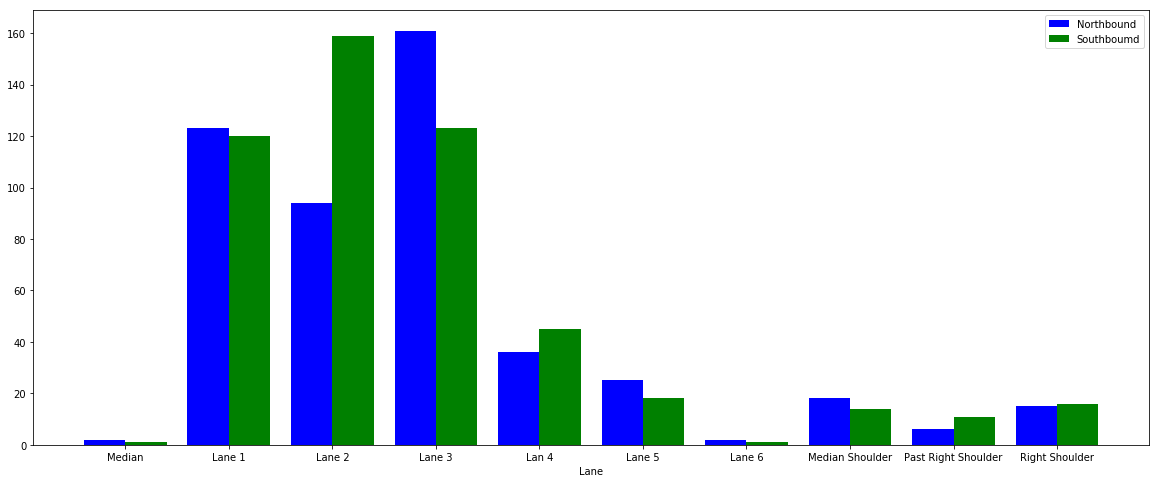

In [118]:
import matplotlib.pyplot as plt
dfnorth_sum =table1['2734']
print(dfnorth_sum)
dfsouth_sum = table2['2760']
print(dfsouth_sum)
plt.figure(figsize=(20,8))
ax = plt.subplot(111)
label_name = ['Median','Lane 1','Lane 2','Lane 3','Lan 4','Lane 5','Lane 6','Median Shoulder','Past Right Shoulder','Right Shoulder']
x=np.linspace(0,dfnorth_sum.shape[0]-1,10)
bar1 = ax.bar(x-0.2,dfnorth_sum.sort_index(),tick_label= label_name,width=-0.4, color='b',align = 'edge')
bar2 = ax.bar(x,dfsouth_sum.sort_index(), width=0.4, color='g')

ax.legend((bar1,bar2),('Northbound','Southboumd'))
plt.xlabel('Lane')

In [121]:
dftrip.head(2)

,Trip def ID,Possible 2nd trip def ID,Entry plaza,Exit plaza,Actual entry mile post,Actual exit mile post
0,2731,2686,4,7,13.6,20.47
1,2732,2687,4,12,13.6,28.98


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = None

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


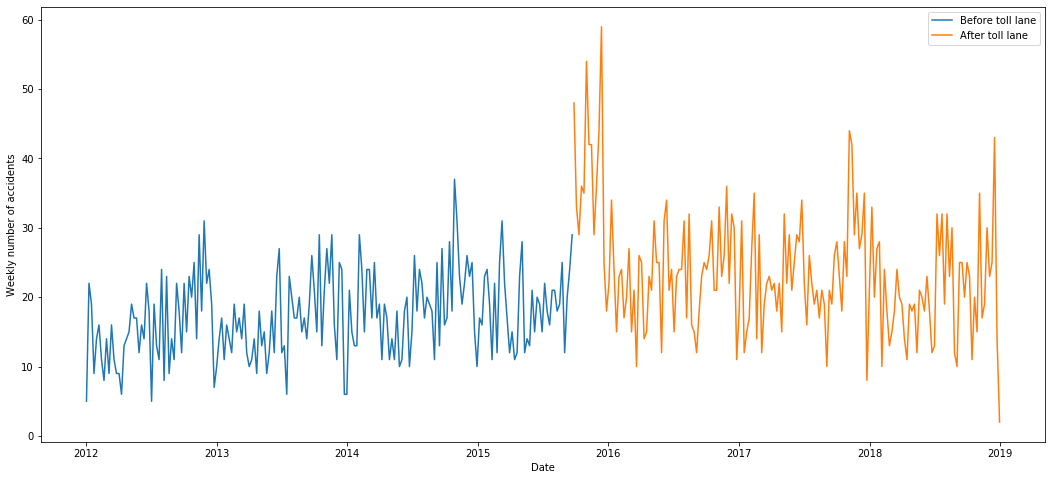

In [42]:
df = pd.read_excel('../../data/crash_data/crash_data_I405.xlsx',sheet_name= 'Detailed Crash History',skiprows = 3)
df['DATE'] = pd.to_datetime(df['DATE'])
dfdate = df[['DATE']]
dfdate['num'] = 1
fig, ax = plt.subplots(figsize = (18,8))
dfdate.set_index('DATE',inplace= True)
#September 27, 2015 - Toll lanes
dfdate1 = dfdate.loc[:'2015-09-26']
dfdate2 = dfdate.loc['2015-09-27':]
ax.plot(dfdate1['num'].resample('7D').sum(), label ='Before toll lane')
ax.plot(dfdate2['num'].resample('7D').sum(), label ='After toll lane')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Weekly number of accidents")
plt.savefig('../../notebooks/Kiana/figures/crashnumber_timeseries.png',dpi = 400)

            num
DATE           
2012-01-03    1
2012-01-04    1
2012-01-10    1
2012-01-10    1
2012-01-10    1
...         ...
2018-12-22    1
2018-12-25    1
2018-12-28    1
2018-12-28    1
2018-12-31    1

[3470 rows x 1 columns]


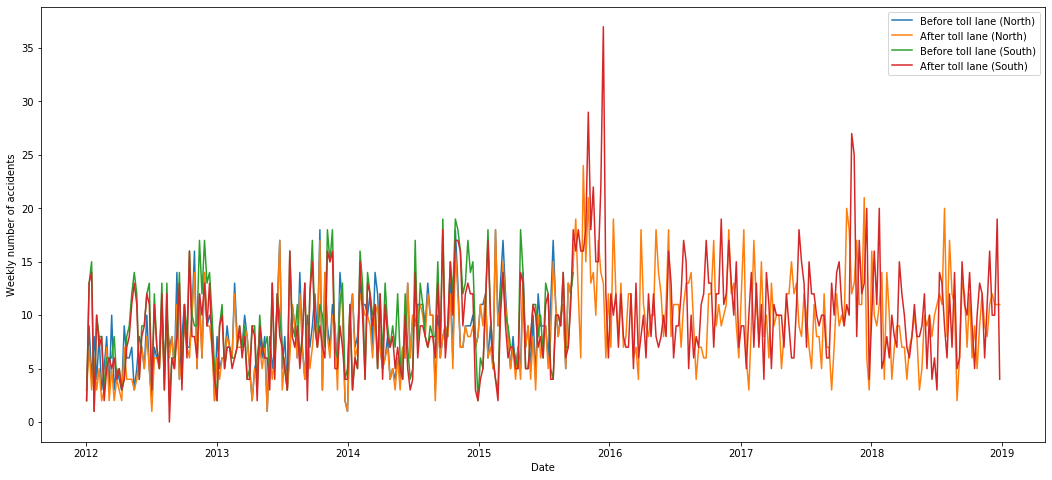

In [50]:
df['North_South'] = df['FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)'].str.extract(r'(Decreasing|Increasing)',expand=True)
df['num'] = 1
dfnorth = df[df['North_South']=='Increasing']
dfsouth = df[df['North_South']=='Decreasing']
dfnorthdate = dfnorth[['DATE','num']]
dfnorthdate.set_index('DATE',inplace= True)
dfsouthdate = dfsouth[['DATE','num']]
dfsouthdate.set_index('DATE',inplace= True)
dfnorthdate1 = dfnorthdate.loc[:'2015-09-26']
dfnorthdate2 = dfnorthdate.loc['2015-09-27':]
dfsouthdate1 = dfsouthdate.loc[:'2015-09-26']
dfsouthdate2 = dfsouthdate.loc['2015-09-27':]
print(dfsouthdate2.sort_values(by='DATE'))
fig,ax = plt.subplots(figsize = (18,8))
ax.plot(dfnorthdate1['num'].resample('7D').sum(), label ='Before toll lane (North)')
ax.plot(dfnorthdate2['num'].resample('7D').sum(), label ='After toll lane (North)')
ax.plot(dfsouthdate1['num'].resample('7D').sum(), label ='Before toll lane (South)')
ax.plot(dfsouthdate2['num'].resample('7D').sum(), label ='After toll lane (South)')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Weekly number of accidents")
plt.savefig('../../notebooks/Kiana/figures/crashnumber_timeseries_NS.png',dpi = 400)

In [ ]:
dfnew = df[df['DATE'].dt.year == 2018 ]

In [3]:
dfnew['North_South'] =dfnew['FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)'].str.extract(r'(Decreasing|Increasing)',expand=True)
dfnewnorth = dfnew[dfnew['North_South']=='Increasing']
dfnewsouth = dfnew[dfnew['North_South']=='Decreasing']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Analyzing segments with 2-lane and 1-lane HOT lanes

In [4]:
dftrip =  pd.read_csv('../../data/crash_data/crash_data_segments.csv')
print(dftrip['Note'])
for i in range(0, len(dftrip['Note'])):
    y1 = dftrip['Note'].iloc[i]
    y2 = dftrip['Actual entry mile post'].iloc[i]
    y3 = dftrip['Actual exit mile post'].iloc[i]
    y1 =str(y1)
    if(y2 <y3):
        dfnewnorth[y1] = dfnewnorth['MILEPOST'].apply(lambda x: 1 if (y2<x and y3>x)  else 0)
    elif(y3<y2):
        dfnewsouth[y1] = dfnewsouth['MILEPOST'].apply(lambda x: 1 if (y2>x and y3<x)  else 0) 

0        Northbound (total)
1        Southbound (total)
2    Southbound (2lane HOT)
3    Northbound (2lane HOT)
4    Southbound (1lane HOT)
5    Northbound (1lane HOT)
Name: Note, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
table1 = pd.pivot_table(dfnewnorth, index = 'FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)',aggfunc=np.sum )
table2 = pd.pivot_table(dfnewsouth, index = 'FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)',aggfunc=np.sum )
tot_north = table1.sum().to_frame().T
tot_south = table2.sum().to_frame().T
dfnorth_sum =table1['Northbound (total)']
dfsouth_sum = table2['Southbound (total)']
print(dfsouth_sum)
print(dfnorth_sum)
dfnorth_sum_2lane =table1['Northbound (2lane HOT)']
dfsouth_sum_2lane = table2['Southbound (2lane HOT)']
dfnorth_sum_1lane =table1['Northbound (1lane HOT)']
dfsouth_sum_1lane = table2['Southbound (1lane HOT)']

FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)
In Median Decreasing Milepost                1
Lane 1 Decreasing Milepost                 126
Lane 2 Decreasing Milepost                 164
Lane 3 Decreasing Milepost                 128
Lane 4 Decreasing Milepost                  54
Lane 5 Decreasing Milepost                  19
Lane 6 Decreasing Milepost                   1
Median Shoulder Decreasing Milepost         14
Past Right Shoulder Decreasing Milepost     11
Right Shoulder Decreasing Milepost          17
Name: Southbound (total), dtype: int64
FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)
In Median Increasing Milepost                2
Lane 1 Increasing Milepost                 120
Lane 2 Increasing Milepost                  95
Lane 3 Increasing Milepost                 160
Lane 4 Increasing Milepost                  34
Lane 5 Increasing Milepost                  25
Lane 6 Increasing Milepost                   2
Median Shoulder Incr

FIRST IMPACT LOCATION (City, County & Misc Trafficways - 2010 forward)
In Median Increasing Milepost                2
Lane 1 Increasing Milepost                 120
Lane 2 Increasing Milepost                  95
Lane 3 Increasing Milepost                 160
Lane 4 Increasing Milepost                  34
Lane 5 Increasing Milepost                  25
Lane 6 Increasing Milepost                   2
Median Shoulder Increasing Milepost         17
Past Right Shoulder Increasing Milepost      6
Right Shoulder Increasing Milepost          14
Name: Northbound (total), dtype: int64


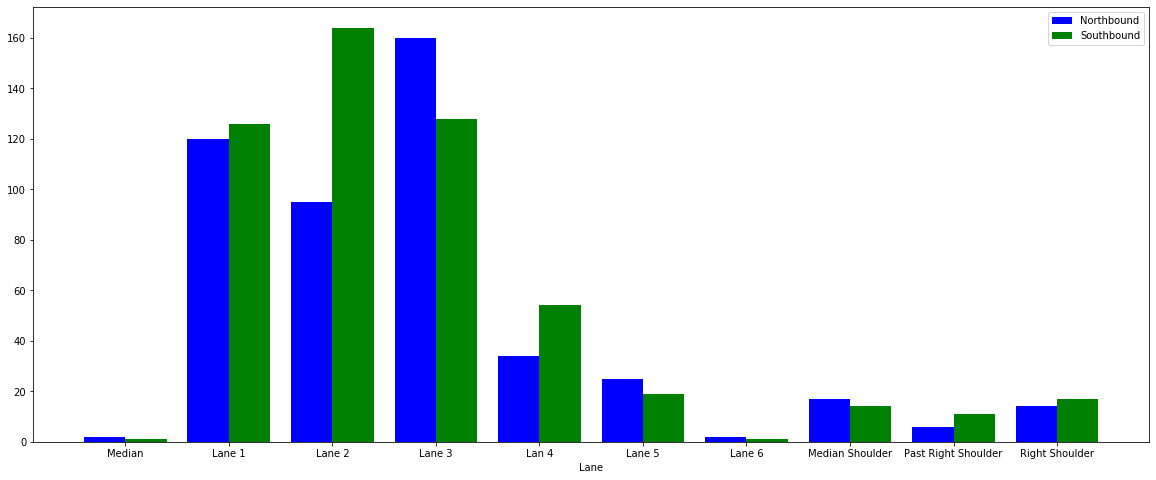

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(20,8))
ax = plt.subplot(111)
label_name = ['Median','Lane 1','Lane 2','Lane 3','Lan 4','Lane 5','Lane 6','Median Shoulder','Past Right Shoulder','Right Shoulder']
x=np.linspace(0,dfnorth_sum.shape[0]-1,10)
print(dfnorth_sum.sort_index())
bar1 = ax.bar(x-0.2,dfnorth_sum.sort_index(),tick_label= label_name,width=-0.4, color='b',align = 'edge')
bar2 = ax.bar(x,dfsouth_sum.sort_index(), width=0.4, color='g')
ax.legend((bar1,bar2),('Northbound','Southbound'))
plt.xlabel('Lane')
plt.show()
plt.savefig('../../notebooks/Kiana/figures/crashnumber_corridor.png',dpi = 400)

In [ ]:
dfnorth_sum_2lane['HOT lane (lane1 + lane2 + median)'] = dfnorth_sum_2lane['In Median Increasing Milepost']+ dfnorth_sum_2lane['Lane 1 Increasing Milepost'] + dfnorth_sum_2lane['Lane 2 Increasing Milepost'] + dfnorth_sum_2lane['Median Shoulder Increasing Milepost']

dfnorth_sum_2lane['GP lane'] = dfnorth_sum_2lane['Lane 3 Increasing Milepost']+ dfnorth_sum_2lane['Lane 4 Increasing Milepost'] + dfnorth_sum_2lane['Lane 5 Increasing Milepost'] + dfnorth_sum_2lane['Lane 6 Increasing Milepost'] + dfnorth_sum_2lane['Past Right Shoulder Increasing Milepost'] + dfnorth_sum_2lane['Right Shoulder Increasing Milepost']  

dfsouth_sum_2lane['HOT lane (lane1 + lane2 + median)'] = dfsouth_sum_2lane['In Median Decreasing Milepost']+ dfsouth_sum_2lane['Lane 1 Decreasing Milepost'] + dfsouth_sum_2lane['Lane 2 Decreasing Milepost'] + dfsouth_sum_2lane['Median Shoulder Decreasing Milepost']

dfsouth_sum_2lane['GP lane'] = dfsouth_sum_2lane['Lane 3 Decreasing Milepost']+ dfsouth_sum_2lane['Lane 4 Decreasing Milepost'] + dfsouth_sum_2lane['Lane 5 Decreasing Milepost'] + dfsouth_sum_2lane['Lane 6 Decreasing Milepost'] + dfsouth_sum_2lane['Past Right Shoulder Decreasing Milepost'] + dfsouth_sum_2lane['Right Shoulder Decreasing Milepost']  

dfnorth_sum_1lane['HOT lane (lane1 + median)'] = dfnorth_sum_1lane['In Median Increasing Milepost'] + dfnorth_sum_1lane['Lane 1 Increasing Milepost'] + dfnorth_sum_1lane['Median Shoulder Increasing Milepost']

dfnorth_sum_1lane['GP lane'] = dfnorth_sum_1lane['Lane 3 Increasing Milepost']+ dfnorth_sum_1lane['Lane 4 Increasing Milepost'] + dfnorth_sum_1lane['Lane 5 Increasing Milepost'] + dfnorth_sum_1lane['Lane 6 Increasing Milepost'] + dfnorth_sum_1lane['Past Right Shoulder Increasing Milepost'] + dfnorth_sum_1lane['Right Shoulder Increasing Milepost']  

dfsouth_sum_1lane['HOT lane (lane1 + median)'] = dfsouth_sum_1lane['In Median Decreasing Milepost'] + dfsouth_sum_1lane['Lane 1 Decreasing Milepost'] + dfsouth_sum_1lane['Median Shoulder Decreasing Milepost']
  
dfsouth_sum_1lane['GP lane'] = dfsouth_sum_1lane['Lane 3 Decreasing Milepost']+ dfsouth_sum_1lane['Lane 4 Decreasing Milepost'] + dfsouth_sum_1lane['Lane 5 Decreasing Milepost'] + dfsouth_sum_1lane['Lane 6 Decreasing Milepost'] + dfsouth_sum_1lane['Past Right Shoulder Decreasing Milepost'] + dfsouth_sum_1lane['Right Shoulder Decreasing Milepost']                                                                
                                                                    
dfnorth_sum_2lane_summary = dfnorth_sum_2lane[['HOT lane (lane1 + lane2 + median)','GP lane']]                                                                    
dfsouth_sum_2lane_summary = dfsouth_sum_2lane[['HOT lane (lane1 + lane2 + median)','GP lane']]                                                                    
                                                                     
dfnorth_sum_1lane_summary = dfnorth_sum_1lane[['HOT lane (lane1 + median)','GP lane']]                                                                    
dfsouth_sum_1lane_summary = dfsouth_sum_1lane[['HOT lane (lane1 + median)','GP lane']]                                                                                                                                      

2


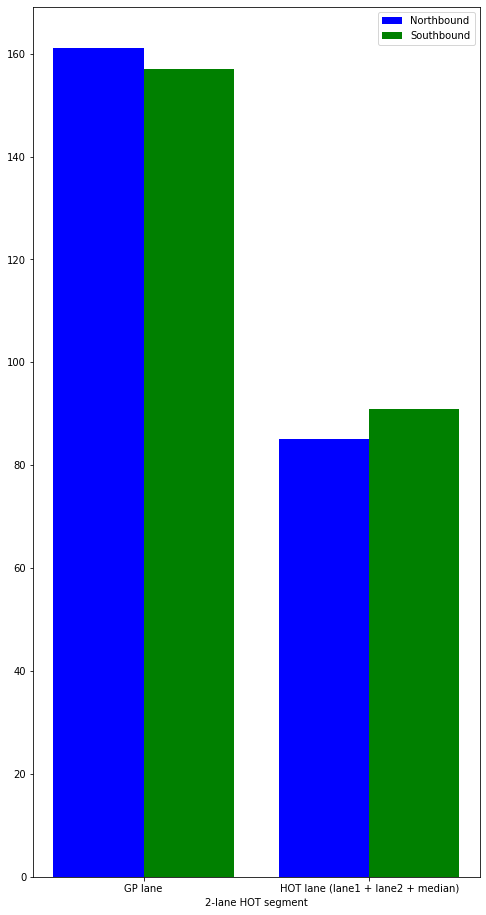

<Figure size 432x288 with 0 Axes>

In [17]:

plt.figure(figsize=(8,16))
ax = plt.subplot(111)
label_name = ['GP lane','HOT lane (lane1 + lane2 + median)']
print(dfnorth_sum_2lane_summary.shape[0])
x=np.linspace(0,dfnorth_sum_2lane_summary.shape[0]-1,2)
bar1 = ax.bar(x-0.2,dfnorth_sum_2lane_summary.sort_index(),tick_label= label_name,width=-0.4, color='b',align = 'edge')
bar2 = ax.bar(x,dfsouth_sum_2lane_summary.sort_index(), width=0.4, color='g')
ax.legend((bar1,bar2),('Northbound','Southbound'))
plt.xlabel('2-lane HOT segment')
plt.show()
plt.savefig('../../notebooks/Kiana/figures/crashnumber_corridor_2laneHOT.png',dpi = 400)

2


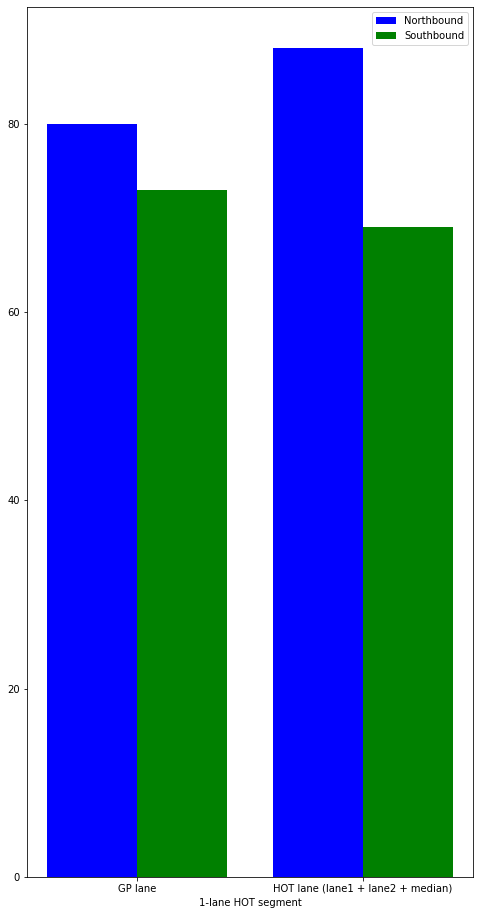

<Figure size 432x288 with 0 Axes>

In [18]:

plt.figure(figsize=(8,16))
ax = plt.subplot(111)
label_name = ['GP lane','HOT lane (lane1 + lane2 + median)']
print(dfnorth_sum_1lane_summary.shape[0])
x=np.linspace(0,dfnorth_sum_1lane_summary.shape[0]-1,2)
bar1 = ax.bar(x-0.2,dfnorth_sum_1lane_summary.sort_index(),tick_label= label_name,width=-0.4, color='b',align = 'edge')
bar2 = ax.bar(x,dfsouth_sum_1lane_summary.sort_index(), width=0.4, color='g')
ax.legend((bar1,bar2),('Northbound','Southbound'))
plt.xlabel('1-lane HOT segment')
plt.show()
plt.savefig('../../notebooks/Kiana/figures/crashnumber_corridor_1laneHOT.png',dpi = 400)